# EDA - Analysing the Titanic dataset

In this Notebook we will do an EDA (Exploratory Data Analysis) In the Titanic Dataset ([*link*](https://www.kaggle.com/c/titanic/data))

Following the PDSA Cycle, let's answer the 3 PDSA's questions:
* Objective: Understand the features; Clean the Dataset; Find a good ML algorithm;
* Methodology: Analyze the data, using different visualizantions and metrics; Apply transformations that will bring value to the data; Test a list of ML algorithms, with different parameters, to find out the best ML algorithm for this dataset;
* Espected Results: A better undertanding of the dataset and its limitations; A Cleaning process that will bring more value to the ML phase; Compare the ML Algorithms with diferent evaluations: ROC Curve, Accuracy and F1_score;

Let's start by loading the dataset and checking some informations.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/titanic/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Explanation about each variable

* PassengerId: unique identifier of the row
* Survived: Survival (0 = No; 1 = Yes)
* Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name: Passenger Name
* Sex: Sex
* Age: Age
* SibSp: Number of Siblings/Spouses Aboard
* Parch: Number of Parents/Children Aboard
* Ticket: Ticket Number
* Fare: Passenger Fare
* Cabin: Cabin
* Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [55]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Understanding the variables

We can see above that there are 891 rows in the Dataset.

The ***PassengerId*** id column is a support column created by the owner of the dataset. Since we already have the dataframe index we can drop it.

Some of those rows have NA values, and they are ('Age','Cabin','Embarked'). Cabin is the most impacted variable with only 204 populated values in a total of 891. Since this variable is so damaged, let's also drop it. About the other 2, we can ignore the NA values while analysing (we still can use then in the ML phase).

There are also 2 columns that, in my opnion, don't bring any value to the analysis: 'Name' and 'Ticket'. So for now let's also drop them.

For the others non-Categorical variables, let's visulize the correlation for a better understanding.

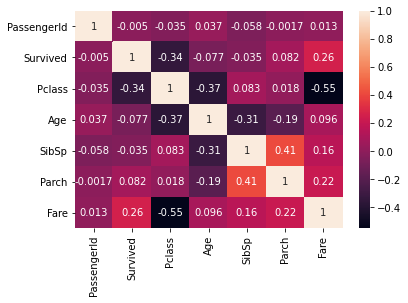

In [57]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Apparently the 'Survived' column have some correlations with 'Pclass' and 'Fare' columns. Let's check further this in the analysis section.

So Let's check now all the variables 

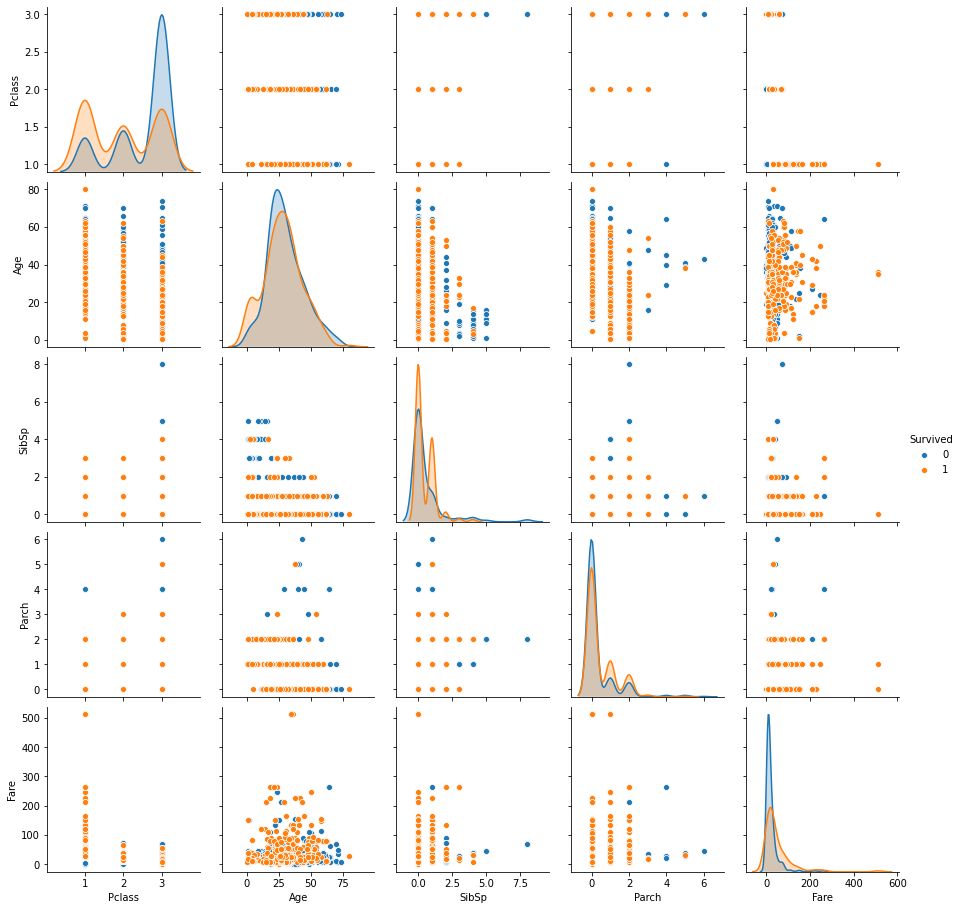

In [58]:

sns.pairplot(df.loc[:, df.columns != 'PassengerId'], hue="Survived")

From the graphic above, it's important to notice that Categorical variables are not ploted.
For the 

I was thinking here, and I didn't get why the Age column was a float column instead of Integer. So let's check some informations:

In [59]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

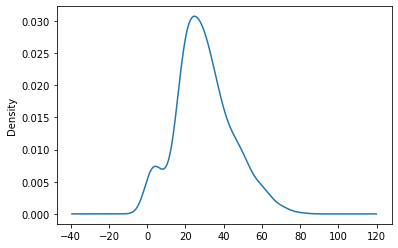

In [60]:
df.Age.plot.kde()

The Min value is 0.42, and maybe they are also counting the Passenger Age months.

In [61]:
df.sort_values(by=['Age'], ascending=True).Age

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

## Preparing the data for the EDA

So let's drop some columns that we didn see any value in our analysis.

In [62]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [63]:
df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Starting the Analysis

So let's start creating some hypothesis and trying to prove them:
1. Did Age played a role in survival?
2. Did Sex played a role in survivel?
3. Did Class played a role in survivel?



### **Question 1**: Did Age played a role in survival?

So lets plot at the same time who survived and who not, related to Age.

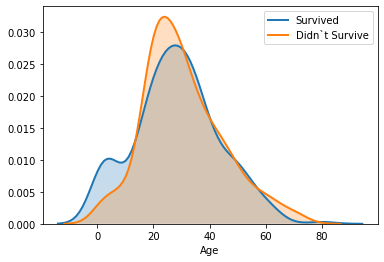

In [65]:
sns.distplot(df[df.Survived == 1].Age, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Survived')
sns.distplot(df[df.Survived == 0].Age, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Didn`t Survive')

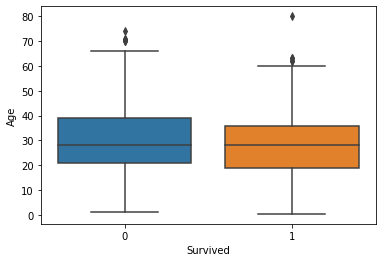

In [78]:
ax = sns.boxplot( x='Survived', y='Age', data=df)

We can see that the youger from the range of 0-17 have a greater survival rate. For the other hand, the range between 18-35 have a lower survivavel rate. For the range of 36-60, the Survival rate are around the same, with minor difference. And for the range 60+, the survival rate droped again.

So Answering the question, we could say that **Yes**, the Age played a role in the survival rate.

### **Question 2**: Did Sex played a role in survival?

Now let's check the Survival rate compared with the Sex.

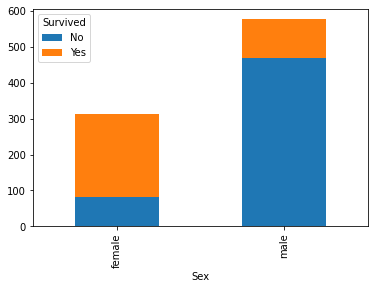

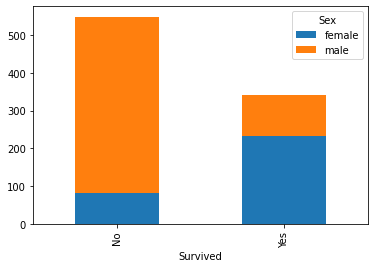

In [13]:
ct = pd.crosstab(df.Sex, df.Survived.map({0:'No', 1:'Yes'}))
ct.plot.bar(stacked=True)

ct = pd.crosstab(df.Survived.map({0:'No', 1:'Yes'}), df.Sex)
ct.plot.bar(stacked=True)

In [14]:
df.Survived.sum()/df.Survived.count()

0.3838383838383838

From the above plot we can confirm 2 things:
1. The Male Survival rate are lower than the Female Survival Rate.
2. Only 38% of the passengers survived this tragedy.

So, answering the question: **Yes**, the Sex played a role in the survival rate.

### **Question 3**: Did Class played a role in survival?

We can start checking the Survival rate for each class.

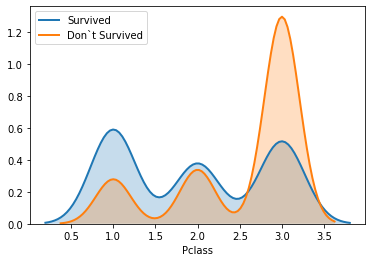

In [15]:
sns.distplot(df[df.Survived == 1].Pclass, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Survived')
sns.distplot(df[df.Survived == 0].Pclass, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Don`t Survived')

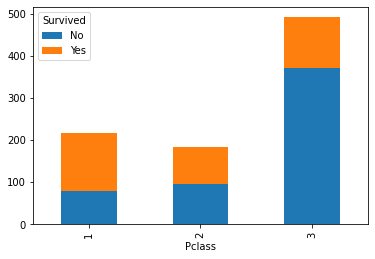

In [16]:
ct = pd.crosstab(df.Pclass, df.Survived.map({0:'No', 1:'Yes'}))
ct.plot.bar(stacked=True)

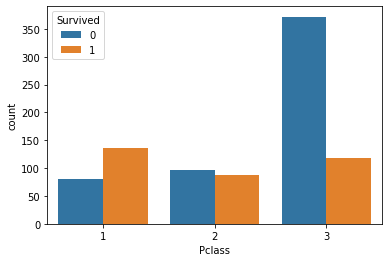

In [17]:
sns.countplot('Pclass',hue='Survived',data=df)

In [18]:
for pc in range(1, 4):
    print('Class {0} survival ratio: {1:2.4f}'.format(pc, df[(df.Pclass==pc)].Survived.sum()/df[(df.Pclass==pc)].Survived.count()))

Class 1 survival ratio: 0.6296
Class 2 survival ratio: 0.4728
Class 3 survival ratio: 0.2424


It's possible to see a difference in the Survival ratio between the 3 classes of passengers.
So we can also answer the question with an **Yes**, the Pclass played a role in the Survival rate.

## Creating a Machine Learning model

So now let's create a Classifier using some algorithms like:
* Random Forest
* SVM - Linear Kernel
* SVM - Radial Kernel
* XGboost
* Decision Tree
* Naive Bayes

But first we need to prepare the data to be used by the ML algorithms. The preparations are:
* Drop some columns
* Create new support columns
* Fill the NA values or drop the column
* Transform some categorical values into ordenal/numerical values

### Preparing the Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
df = pd.read_csv('data/titanic/train.csv')

def clean_data(_df):
    # Age - Fill NA
    _df.loc[(_df.Age.isnull()) & (_df.Pclass==1), 'Age'] = 38
    _df.loc[(_df.Age.isnull()) & (_df.Pclass==2), 'Age'] = 30
    _df.loc[(_df.Age.isnull()) & (_df.Pclass==3), 'Age'] = 25

    # Sex - Replace 0 1
    _df.Sex = _df.Sex.map({'female':0, 'male':1})

    # Embarked - Replace 0 1 2 and Fill NA
    _df.loc[_df.Embarked.isnull(), 'Embarked'] = 'S'
    _df.Embarked = _df.Embarked.map({'C':0, 'Q':1, 'S':2})

    # Drop columns that we will not use
    _df = _df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
    
    return _df

df = clean_data(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [21]:
train, test = train_test_split(df, test_size=0.3, random_state=0, stratify=df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train.Survived
test_X = test[test.columns[1:]]
test_Y = test.Survived

In [22]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.8283582089552238

In [23]:
# SVM - RBF Kernel
model = svm.SVC(kernel = 'rbf', C = 2, gamma = 'auto')
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.7313432835820896

In [24]:
# SVM - Linear Kernel
model = svm.SVC(kernel = 'linear', C = 0.1)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.7910447761194029

In [25]:
# XGBoost
model = XGBClassifier()
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.835820895522388

In [26]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.8097014925373134

In [27]:
 skein funcio# Naive Bayes - GaussianNB
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.8097014925373134

So now, let's try with the real test database. For this we need to apply the same transformation and cleaning process

In [28]:
train_X = df[df.columns[1:]]
train_Y = df['Survived']
test = pd.read_csv('data/titanic/test.csv')
test_label = pd.read_csv('data/titanic/gender_submission.csv')

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There is one NA value in the Fare column. The Age and Cabin will be already treated by our cleaning algorithm. So for now, let's populate that column with the mean of Fare for other Passangers for the same PClass.

In [30]:
# test.loc[(~test.Fare.isnull()) & (test.Pclass==3), 'Fare'].mean()
test.loc[(test.Fare.isnull()) & (test.Pclass==3), 'Fare'] = 12.45

In [31]:
test = pd.merge(test, test_label, on="PassengerId")

test = clean_data(test)

test_X = test[test.columns[:-1]]
test_Y = test.Survived

In [32]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.8157894736842105

In [33]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred = model.predict(test_X)
metrics.accuracy_score(pred, test_Y)

0.7703349282296651

In [34]:
# XGBoost
model = XGBClassifier()
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print(metrics.accuracy_score(pred, test_Y))
pred_xgboost = pred
test_Y_xgboost = test_Y

0.8229665071770335


Let's check the precision and recall of the best classifier. In this case the XGBoost
* Precision: Rate of positivies classified correctly between all the **predicted** positives
* Recall (TPR): Rate of positivies classified correctly between all the **true** positives
* f1_score: Since Precision and Recall show differents behaviors, it's not a good idea to analise them alone. So for this we can use the F_score metric. If the weight is 1, the metric is the f1_score: (2 * Prec(f) * Rec(f))/(Prec(f) + Rec(f))

In [35]:
print('>>> Each Class <<<')
# Calculate the metrics per class.
precision, recall, f1_score, labels = precision_recall_fscore_support(pred_xgboost, test_Y_xgboost, beta=1, average=None)
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1_score:{f1_score}')
print(f'Labels:{labels}')

>>> Each Class <<<
Precision:[0.85338346 0.76973684]
Recall:[0.86641221 0.75      ]
F1_score:[0.85984848 0.75974026]
Labels:[262 156]


In [36]:
print('>>> Micro <<<')
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision, recall, f1_score, labels = precision_recall_fscore_support(pred_xgboost, test_Y_xgboost, beta=1, average='micro')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1_score:{f1_score}')
print(f'Labels:{labels}')

>>> Micro <<<
Precision:0.8229665071770335
Recall:0.8229665071770335
F1_score:0.8229665071770335
Labels:None


In [37]:
print('>>> Macro <<<')
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision, recall, f1_score, labels = precision_recall_fscore_support(pred_xgboost, test_Y_xgboost, beta=1, average='macro')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1_score:{f1_score}')
print(f'Labels:{labels}')

>>> Macro <<<
Precision:0.8115601503759399
Recall:0.8082061068702291
F1_score:0.8097943722943722
Labels:None


We could notice that the classes are not balanced. But getting the F1_Score for the 'Macro' Precision and Recall, we can see a rate of around 0.81%

The below graph is the ROC Curve, and it's constructed using the FPR and TPR.

In [38]:
fpr, tpr, thresholds = roc_curve(pred_xgboost, test_Y_xgboost)
print(f'FPR: {fpr[1]}')
print(f'TPR: {tpr[1]}')

FPR: 0.13358778625954199
TPR: 0.75


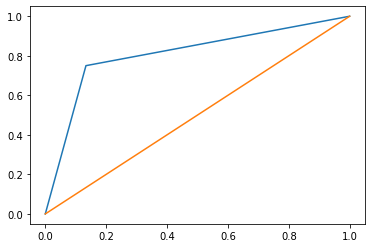

In [39]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

## Conclusion


In this analysis we could notice some features that impacts the survival rate. They are: Age, Sex and Pclass.

For the classifier point of view, there are some observations:
- XGboost showed the best accuracy with 83.5% in the train data and 82.3% in the test data.
- Random Forest algorithm is also good choice, but it showed that depending how you train the model, the accuracy changes between 80% and 83%
- SVM RBF didn't separate well that data and was placed with the worst accuracy. Apparently the RBF Kernel is not a good choice.
- In general, the best percentage was 82.3%. 

The classifier validation methods are: 
* accuracy_score
* Precision, Recall and F1_score
* ROC Curve


For the future work, I would review the cleaning process. I know that there are more information in the dropped featurs that we could use. Also, we could do some other tries like: Create some support features and merge with external sources. In this disaster, the cabins also played a great role. If some how we could use the position of the ship's cabin